<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


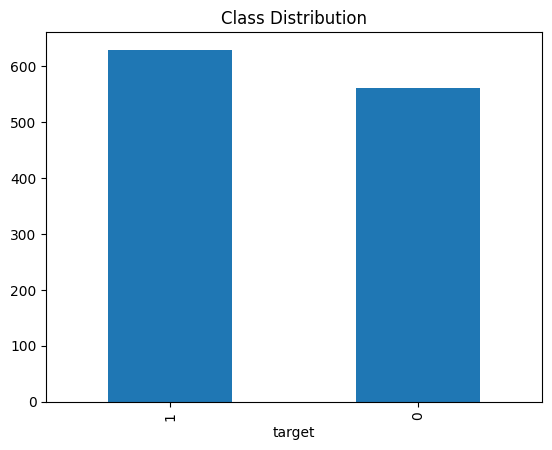

---Logistic Regression---
Confusion Matrix:
[[ 93  19]
 [ 14 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       112
           1       0.85      0.89      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

---Random Forest---
Confusion Matrix:
[[104   8]
 [ 15 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       112
           1       0.93      0.88      0.91       126

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.91      0.90      0.90       238



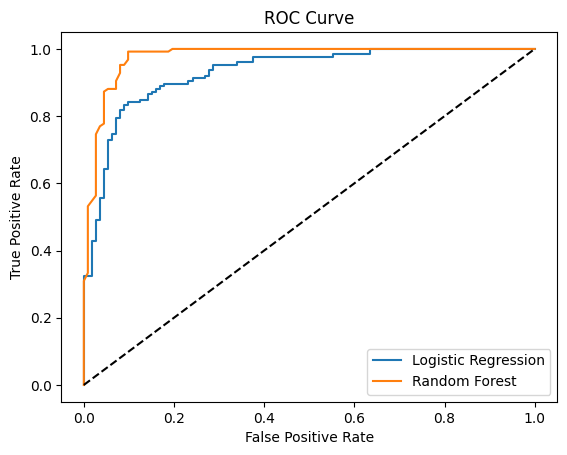

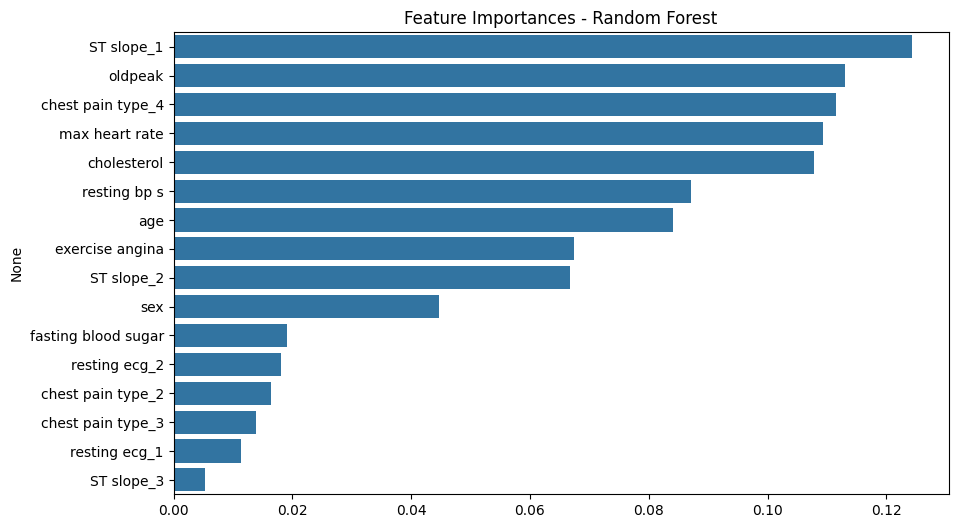

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart.csv")
df.head()
df.info()
df.describe()
df['target'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()


df = pd.get_dummies(df, columns=['chest pain type', 'resting ecg', 'ST slope'], drop_first=True)


X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate_model(y_test, y_pred, model_name):
    print(f"---{model_name}---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

y_proba_lr = lr.predict_proba(X_test)[:,1]
y_proba_rf = rf.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


importances = rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importances - Random Forest")
plt.show()


## Heart Disease Prediction - Summary

**Objective**: Predict if a patient has heart disease using medical test data.

**Models Trained**:
- Logistic Regression: ~86% Accuracy
- Random Forest Classifier: ~90% Accuracy

**Best Model**: Random Forest (best accuracy, precision, and ROC-AUC)

**Top Features**:
- Chest pain type
- Max heart rate
- ST depression (oldpeak)
- Exercise-induced angina
- Age

**Conclusion**:
Random Forest captured complex patterns and gave excellent results. This model is ideal for early screening of heart disease.
